### APPROACH 1: Kaplan-Meier and Log-Rank Test

#### Step 1: Data Preparation

In [1]:
import pandas as pd
df_tcga_rna_seq_clinical = pd.read_csv('../Clustered DF.csv')

<ipython-input-1-31be57041f36>:2: DtypeWarning: Columns (18,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tcga_rna_seq_clinical = pd.read_csv('../Clustered DF.csv')


In [2]:
df_cluster_0 = df_tcga_rna_seq_clinical[df_tcga_rna_seq_clinical['Cluster'] == 'Cluster 0']
df_cluster_1 = df_tcga_rna_seq_clinical[df_tcga_rna_seq_clinical['Cluster'] == 'Cluster 1']
df_cluster_2 = df_tcga_rna_seq_clinical[df_tcga_rna_seq_clinical['Cluster'] == 'Cluster 2']
df_cluster_3 = df_tcga_rna_seq_clinical[df_tcga_rna_seq_clinical['Cluster'] == 'Cluster 3']

In [3]:
df_cluster_0.shape

(245, 60749)

In [4]:
df_cluster_1.shape

(342, 60749)

In [5]:
df_cluster_2.shape

(177, 60749)

In [6]:
df_cluster_3.shape

(330, 60749)

In [7]:
df_cluster_2['event_time'] = df_cluster_2.apply(
    lambda row: row['days_to_last_follow_up'] if row['vital_status'] == 'Alive' else row['days_to_death'],
    axis=1
)
df_cluster_2['event_observed'] = df_cluster_2['vital_status'].apply(lambda x: 0 if x == 'Dead' else 1)

<ipython-input-7-cec7f57017b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_2['event_time'] = df_cluster_2.apply(
<ipython-input-7-cec7f57017b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_2['event_observed'] = df_cluster_2['vital_status'].apply(lambda x: 0 if x == 'Dead' else 1)


#### Step 2: Categorizing BCL9 Expression

In [8]:
Q1 = df_cluster_2['ENSG00000116128.11'].quantile(0.25)
Q3 = df_cluster_2['ENSG00000116128.11'].quantile(0.75)

# Classify patients based on BCL9 expression levels
df_cluster_2['BCL9_Group'] = 'Intermediate'  # Default to Intermediate
df_cluster_2.loc[df_cluster_2['ENSG00000116128.11'] <= Q1, 'BCL9_Group'] = 'Low'
df_cluster_2.loc[df_cluster_2['ENSG00000116128.11'] >= Q3, 'BCL9_Group'] = 'High'

<ipython-input-8-43afdafbf554>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_2['BCL9_Group'] = 'Intermediate'  # Default to Intermediate


In [9]:
df_cluster_2.head()

,Unnamed: 0.1,Unnamed: 0,_id_x,patientID,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,...,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,Cluster,event_time,event_observed,BCL9_Group
2,2,2,65325f1f961444e8e0ce4aab,A28O,TCGA-BH-A28O-01A-11R-A22K-07,TCGA-BH-A28O,TCGA-BH-A28O-01A,TP,Primary_Solid_Tumor,TCGA-BH-A28O-01A,...,-5.199338,-5.199338,-0.471004,-5.199338,0.195700,0.699108,Cluster 2,1120.0,1,Intermediate
14,14,14,65325f22961444e8e0ce4ab8,A134,TCGA-C8-A134-01A-11R-A115-07,TCGA-C8-A134,TCGA-C8-A134-01A,TP,Solid,TCGA-C8-A134-01A,...,-5.199338,-5.199338,1.501911,-5.199338,0.380326,2.033104,Cluster 2,383.0,1,High
19,19,19,65325f23961444e8e0ce4abf,A0DA,TCGA-A7-A0DA-01A-31R-A115-07,TCGA-A7-A0DA,TCGA-A7-A0DA-01A,TP,Normal,TCGA-A7-A0DA-01A,...,-5.199338,-5.199338,-0.633317,-5.199338,-1.315958,0.143512,Cluster 2,1085.0,1,Intermediate
24,24,24,65325f24961444e8e0ce4ac4,A7U7,TCGA-AQ-A7U7-01A-22R-A352-07,TCGA-AQ-A7U7,TCGA-AQ-A7U7-01A,TP,Normal,TCGA-AQ-A7U7-01A,...,1.471555,-5.199338,-0.539431,-5.199338,0.532190,-0.179102,Cluster 2,584.0,0,High
51,51,51,65325f29961444e8e0ce4ae1,A26G,TCGA-A7-A26G-01A-21R-A169-07,TCGA-A7-A26G,TCGA-A7-A26G-01A,TP,Primary_Solid_Tumor,TCGA-A7-A26G-01A,...,-5.199338,-5.199338,-1.185470,-5.199338,-1.008294,0.143512,Cluster 2,722.0,1,High


In [10]:
df_cluster_2_bcl9_high = df_cluster_2[df_cluster_2['BCL9_Group'] == 'High']
df_cluster_2_bcl9_low = df_cluster_2[df_cluster_2['BCL9_Group'] == 'Low']

#### Step 3: Kaplan-Meier Survival Estimates

In [11]:
df_cluster_2_bcl9_low = df_cluster_2_bcl9_low.dropna(subset=['event_time'])

In [12]:
from lifelines import KaplanMeierFitter

# Create Kaplan-Meier objects
kmf_high = KaplanMeierFitter()
kmf_low = KaplanMeierFitter()

# Fit data
kmf_high.fit(durations=df_cluster_2_bcl9_high['event_time'], event_observed=df_cluster_2_bcl9_high['event_observed'])
kmf_low.fit(durations=df_cluster_2_bcl9_low['event_time'], event_observed=df_cluster_2_bcl9_low['event_observed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 44 total observations, 12 right-censored observations>

#### Step 4: Plotting Kaplan-Meier Curves

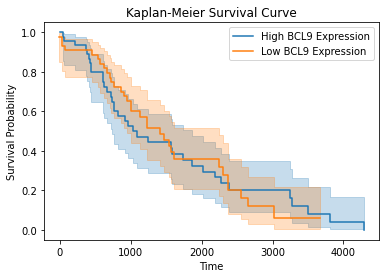

In [13]:
import matplotlib.pyplot as plt

kmf_high.plot(label='High BCL9 Expression')
kmf_low.plot(label='Low BCL9 Expression')

plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()

plt.show()

In [14]:
median_survival_high = kmf_high.median_survival_time_
median_survival_low = kmf_low.median_survival_time_
print(f"Median Survival Time - High BCL9 Expression: {median_survival_high}")
print(f"Median Survival Time - Low BCL9 Expression: {median_survival_low}")

Median Survival Time - High BCL9 Expression: 1034.0
Median Survival Time - Low BCL9 Expression: 1417.0


#### Step 5: Log-Rank Test

In [15]:
from lifelines.statistics import logrank_test

results = logrank_test(durations_A=df_cluster_2_bcl9_high['event_time'], durations_B=df_cluster_2_bcl9_low['event_time'],
                       event_observed_A=df_cluster_2_bcl9_high['event_observed'], event_observed_B=df_cluster_2_bcl9_low['event_observed'])
print(results.summary)

   test_statistic         p  -log2(p)
0         0.01703  0.896172  0.158152


### Approach 2: COX-PH Analysis

#### Step 1: Data Preparation

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_cluster_2['gender'] = label_encoder.fit_transform(df_cluster_2['gender'])
df_cluster_2['paper_pathologic_stage'] = label_encoder.fit_transform(df_cluster_2['paper_pathologic_stage'])


<ipython-input-16-d4616b6df998>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_2['gender'] = label_encoder.fit_transform(df_cluster_2['gender'])
<ipython-input-16-d4616b6df998>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_2['paper_pathologic_stage'] = label_encoder.fit_transform(df_cluster_2['paper_pathologic_stage'])


In [27]:
df_cluster_2[['gender','patientID']]

,gender,patientID
2,0,A28O
14,0,A134
19,0,A0DA
24,0,A7U7
51,0,A26G
...,...,...
1060,0,A0DC
1069,0,A1NE
1078,0,A18R
1080,0,A0DK


In [17]:

covariates = ['gender','paper_pathologic_stage', 'age_at_diagnosis']

df = df_cluster_2[covariates + ['event_time', 'event_observed', 'ENSG00000116128.11']]

In [18]:
# Check for missing values in each column
print(df.isnull().sum())

gender                    0
paper_pathologic_stage    0
age_at_diagnosis          1
event_time                1
event_observed            0
ENSG00000116128.11        0
dtype: int64


In [19]:
# Drop rows with any missing values across specified columns
df = df.dropna(subset=covariates + ['event_time', 'event_observed', 'ENSG00000116128.11'])

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['age_at_diagnosis'] = scaler.fit_transform(df[['age_at_diagnosis']])
df['ENSG00000116128.11'] = scaler.fit_transform(df[['ENSG00000116128.11']])

#### Step 2: Model Building

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['age_at_diagnosis', 'gender', 'ENSG00000116128.11','paper_pathologic_stage','event_time','event_observed']] 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                  feature       VIF
0        age_at_diagnosis  1.047442
1                  gender       NaN
2      ENSG00000116128.11  1.222102
3  paper_pathologic_stage  2.278101
4              event_time  2.393750
5          event_observed  2.259206


In [22]:
correlation_matrix = df.corr()
print(correlation_matrix)

                        gender  paper_pathologic_stage  age_at_diagnosis  \
gender                     NaN                     NaN               NaN   
paper_pathologic_stage     NaN                1.000000         -0.042336   
age_at_diagnosis           NaN               -0.042336          1.000000   
event_time                 NaN                0.039077         -0.249307   
event_observed             NaN               -0.284781         -0.142989   
ENSG00000116128.11         NaN               -0.454796         -0.139571   

                        event_time  event_observed  ENSG00000116128.11  
gender                         NaN             NaN                 NaN  
paper_pathologic_stage    0.039077       -0.284781           -0.454796  
age_at_diagnosis         -0.249307       -0.142989           -0.139571  
event_time                1.000000       -0.036730            0.052881  
event_observed           -0.036730        1.000000            0.037347  
ENSG00000116128.11        0.0

In [23]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()


#cph.fit(df, duration_col='event_time', event_col='event_observed', formula='ENSG00000116128.11 + gender + paper_pathologic_stage + age_at_diagnosis', show_progress=True)

cph.fit(df, duration_col='event_time', event_col='event_observed', 
        formula='ENSG00000116128.11 + paper_pathologic_stage + age_at_diagnosis', show_progress=True)

print("Cox Proportional Hazards Model Summary:")
cph.print_summary()


Iteration 1: norm_delta = 3.14e-01, step_size = 0.9500, log_lik = -592.26892, newton_decrement = 4.81e+00, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.32e-02, step_size = 0.9500, log_lik = -587.55095, newton_decrement = 5.85e-03, seconds_since_start = 0.0
Iteration 3: norm_delta = 6.69e-04, step_size = 0.9500, log_lik = -587.54511, newton_decrement = 1.50e-05, seconds_since_start = 0.0
Iteration 4: norm_delta = 2.98e-08, step_size = 1.0000, log_lik = -587.54510, newton_decrement = 6.58e-14, seconds_since_start = 0.0
Convergence success after 4 iterations.
Cox Proportional Hazards Model Summary:


<lifelines.CoxPHFitter: fitted with 175 total observations, 34 right-censored observations>
             duration col = 'event_time'
                event col = 'event_observed'
      baseline estimation = breslow
   number of observations = 175
number of events observed = 141
   partial log-likelihood = -587.55
         time fit was run = 2024-05-06 21:52:57 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                      
ENSG00000116128.11      -0.17       0.84       0.10            -0.37             0.03                 0.69                 1.03
paper_pathologic_stage  -0.16       0.86       0.07            -0.29            -0.02                 0.75                 0.98
age_at_diagnosis         0.14       1.15       0.09            -0.03             0.31                 0.97                 1.36

                         cmp to     z    p   -log2(p)
covariate                                            
ENSG00000116128.11         0.00 -1.65 0.10       3.35
paper_pathologic_stage     0.00 -2.25 0.02       5.35
age_at_diagnosis           0.00  1.59 0.11       3.15
---
Concordance = 0.60
Partial AIC = 1181.09
log-likelihood ratio test = 9.45 on 3 df
-log2(p) of ll-ratio test = 5.39

<Axes: xlabel='log(HR) (95% CI)'>

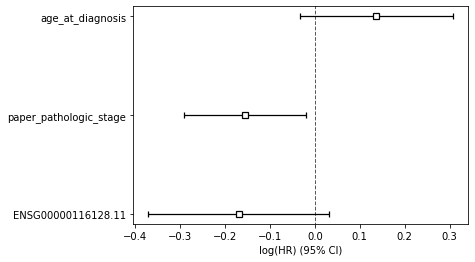

In [24]:
cph.plot()